In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Predict the amount of carbon emission from vehicles based on their type, fuel efficiency, and distance traveled.

In [ ]:
data=pd.read_csv("co2.csv")
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7380    False
7381    False
7382    False
7383    False
7384    False
Length: 7385, dtype: bool

In [ ]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
data['Make'].value_counts()

Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

In [ ]:
#how much CO₂ is emitted, on average,1 kilometer
company_emission_ratio = (data.groupby('Make')['CO2 Emissions(g/km)'].sum())/data['Make'].value_counts()
company_emission_ratio.sort_values(ascending=False, inplace=True)
company_emission_ratio

Make
BUGATTI          522.000000
LAMBORGHINI      400.780488
SRT              389.000000
ROLLS-ROYCE      388.480000
BENTLEY          362.934783
ASTON MARTIN     339.617021
MASERATI         318.147541
GMC              299.917683
RAM              292.402062
LAND ROVER       287.647059
GENESIS          284.840000
MERCEDES-BENZ    277.386635
DODGE            276.361789
JAGUAR           267.987500
LINCOLN          267.302083
CADILLAC         265.854430
CHEVROLET        264.346939
FORD             260.988854
PORSCHE          258.941489
INFINITI         254.064815
BMW              254.007590
AUDI             250.846154
JEEP             250.342629
CHRYSLER         246.170455
LEXUS            241.112360
NISSAN           236.864865
BUICK            233.058252
VOLVO            230.056452
ALFA ROMEO       224.900000
TOYOTA           224.424242
ACURA            223.652778
SUBARU           217.614286
KIA              214.294372
VOLKSWAGEN       209.335025
HYUNDAI          208.871429
MITSUBISHI     

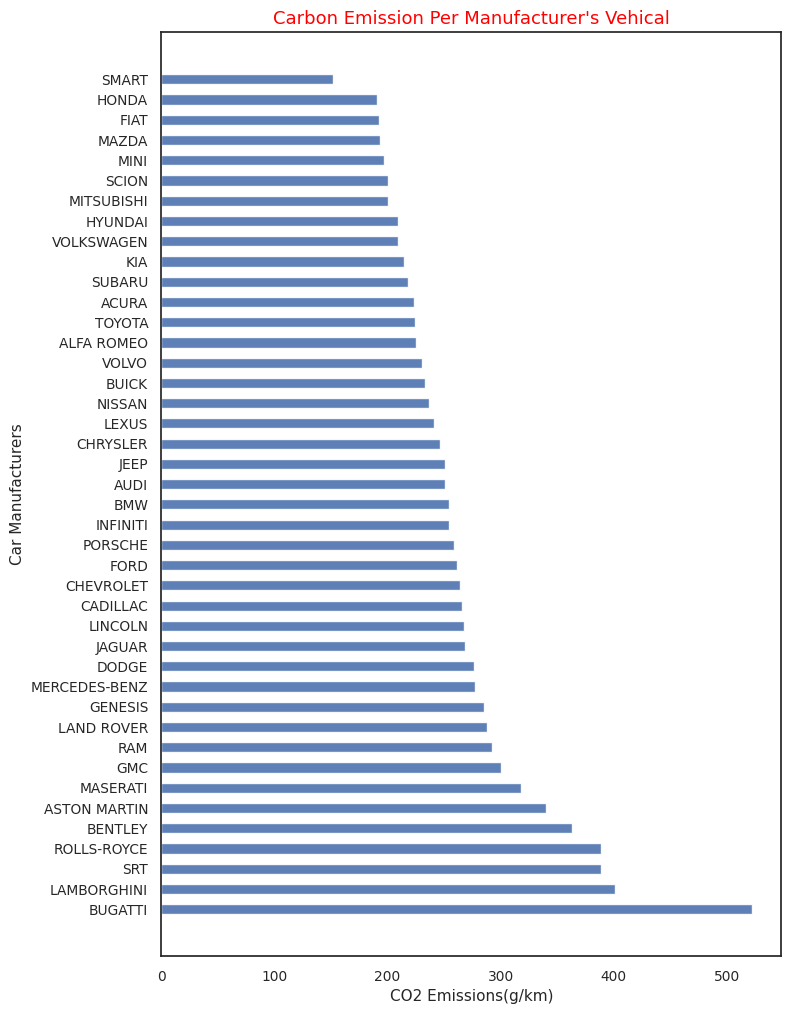

In [ ]:
plt.figure(figsize=(8,12))
sns.set_theme(style="white", font_scale=0.9)
plt.barh(company_emission_ratio.index, company_emission_ratio.values, alpha=0.9,height=0.5)
plt.title("Carbon Emission Per Manufacturer's Vehical", size=13, color='red')
plt.xlabel('CO2 Emissions(g/km)',size=11)
plt.ylabel('Car Manufacturers', size=11)
plt.show()

In [ ]:
# Analyze which fuel types contribute the most (or least) to CO₂ emissions 
co2_by_fuel=(data.groupby('Fuel Type')['CO2 Emissions(g/km)'].sum().reset_index()).sort_values(by='Fuel Type')
co2_by_fuel

,Fuel Type,CO2 Emissions(g/km)
0,D,41571
1,E,101784
2,N,213
3,X,855129
4,Z,851871


In [ ]:
# This code performs a series of operations to analyze the relationship between fuel types, CO₂ emissions, 
# and the number of vehicles using each fuel type. It also maps fuel type codes to their full names and 
# calculates the average CO₂ emissions per vehicle for each fuel type.
number_of_vehicles = (data['Fuel Type'].value_counts().reset_index()).sort_values(by='Fuel Type')
number_of_vehicles
new_df = pd.merge(co2_by_fuel,number_of_vehicles, on='Fuel Type')
new_df['Fuel Extended']=new_df['Fuel Type'].map({'X':'Petrol','E':'Ethanol/Electric','N':'CNG','D':'Diesel','Z':'Hybrid'})
new_df['CO2 Ratio']=new_df['CO2 Emissions(g/km)']/new_df['count']
new_df


,Fuel Type,CO2 Emissions(g/km),count,Fuel Extended,CO2 Ratio
0,D,41571,175,Diesel,237.548571
1,E,101784,370,Ethanol/Electric,275.091892
2,N,213,1,CNG,213.000000
3,X,855129,3637,Petrol,235.119329
4,Z,851871,3202,Hybrid,266.043410


In [ ]:
data['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [ ]:
emission_per_fuel_type = data.groupby('Fuel Type')['CO2 Emissions(g/km)'].sum()/(data['Fuel Type'].value_counts())
em_df = pd.DataFrame(emission_per_fuel_type, columns=['Emission'])
em_df.reset_index(inplace=True)
em_df

,Fuel Type,Emission
0,D,237.548571
1,E,275.091892
2,N,213.000000
3,X,235.119329
4,Z,266.043410


In [ ]:
em_df.replace({'X':'Petrol','E':'Ethanol/Electric','N':'CNG','D':'Diesel','Z':'Hybrid'},inplace=True)
em_df.sort_values(by='Emission',inplace=True)

Text(0.5, 1.0, 'C02 Emission By Engine Type')

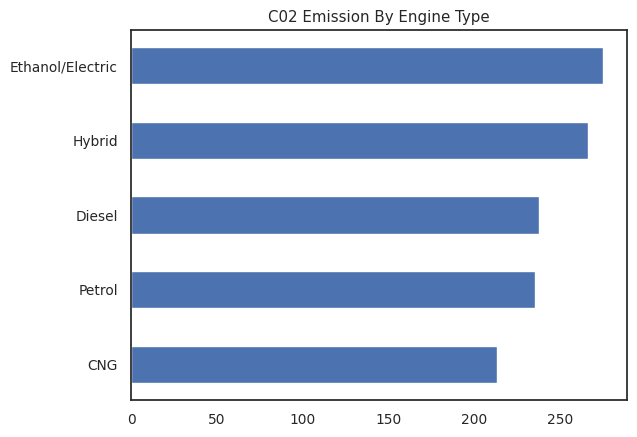

In [ ]:
plt.barh(em_df['Fuel Type'],em_df['Emission'], height=0.5)
plt.title('C02 Emission By Engine Type')

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score, mean_absolute_error, mean_squared_error

In [ ]:
numeric_data=data.select_dtypes(exclude='object')
non_numeric=data.select_dtypes(exclude=('int','float'))

In [ ]:
non_numeric.dtypes


Make             object
Model            object
Vehicle Class    object
Transmission     object
Fuel Type        object
dtype: object

In [ ]:
numeric_data.dtypes


Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [ ]:
for i in non_numeric.columns:
  non_numeric[i]=LabelEncoder().fit_transform(non_numeric[i])

non_numeric

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,0,1057,0,14,4
1,0,1057,0,25,4
2,0,1058,0,22,4
3,0,1233,11,15,4
4,0,1499,11,15,4
...,...,...,...,...,...
7380,41,1951,11,17,4
7381,41,1957,11,17,4
7382,41,1960,11,17,4
7383,41,1968,12,17,4


In [ ]:
df_numeric = pd.concat((non_numeric,numeric_data),axis=1)
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df_numeric), columns=df_numeric.columns)
df_scaled

,Make,Model,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,-1.730214,0.057785,-1.319720,-0.003824,0.836161,-0.856721,-0.883408,-0.759002,-1.052781,-0.855742,0.763110,-0.932933
1,-1.730214,0.057785,-1.319720,1.511325,0.836161,-0.561317,-0.883408,-0.387577,-0.603202,-0.475423,0.209966,-0.505646
2,-1.730214,0.059519,-1.319720,1.098102,0.836161,-1.225976,-0.883408,-1.873275,-1.457401,-1.754677,2.837400,-1.958421
3,-1.730214,0.362820,0.961192,0.133917,0.836161,0.251043,0.210575,0.040990,0.026208,0.043193,-0.343178,0.075464
4,-1.730214,0.823839,0.961192,0.133917,0.836161,0.251043,0.210575,-0.130437,-0.153624,-0.129679,-0.066606,-0.112542
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,1.894621,1.607224,0.961192,0.409399,0.836161,-0.856721,-0.883408,-0.530433,-0.603202,-0.544572,0.348252,-0.539829
7381,1.894621,1.617623,0.961192,0.409399,0.836161,-0.856721,-0.883408,-0.387577,-0.333455,-0.371700,0.209966,-0.317640
7382,1.894621,1.622822,0.961192,0.409399,0.836161,-0.856721,-0.883408,-0.244721,-0.198582,-0.233402,-0.066606,-0.180908
7383,1.894621,1.636687,1.168548,0.409399,0.836161,-0.856721,-0.883408,-0.387577,-0.333455,-0.371700,0.209966,-0.317640


In [ ]:
features = df_scaled.drop('CO2 Emissions(g/km)', axis=1)
target=df_scaled['CO2 Emissions(g/km)']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target, train_size=0.8, random_state=150)

In [ ]:
linear=LinearRegression()
model=linear.fit(x_train,y_train)
print(model)
y_predict=model.predict(x_test)
r2=r2_score(y_test,y_predict)
print(r2)

LinearRegression()
0.9131393188316759


<Axes: >

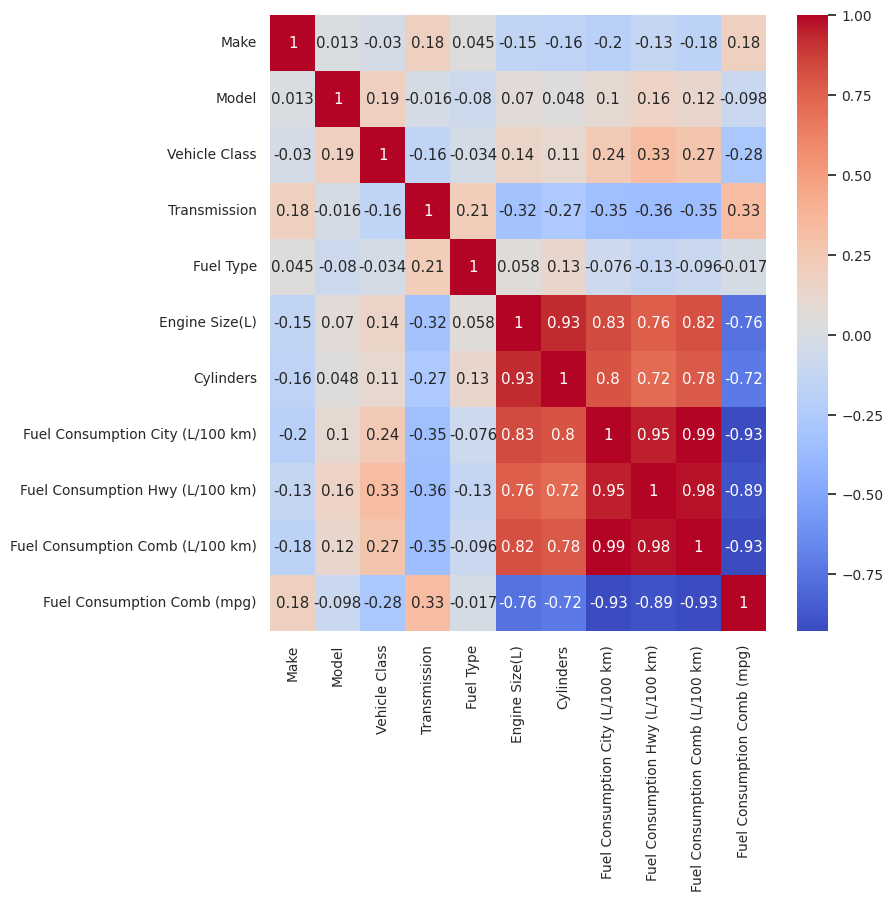

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(features.corr(), cmap="coolwarm", annot=True)

In [ ]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet

In [ ]:
lasso=Lasso(0.1)
lasso_model = lasso.fit(x_train,y_train)
predict_lasso = lasso_model.predict(x_test)
lasso_accurary = r2_score(y_test,predict_lasso)
print(lasso_accurary)

0.8875017076263654


In [ ]:
from sklearn.model_selection import GridSearchCV
params={'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
grid_search = GridSearchCV(lasso,params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=0.1),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9]})

In [ ]:
ridge=Ridge(alpha=0.9)
ridge_model = ridge.fit(x_train,y_train)
ridge_predict = ridge_model.predict(x_test)
print(r2_score(y_test,ridge_predict))

0.9131589540931996


In [ ]:
# grid_search_ridge=GridSearchCV(ridge, params)
# grid_model=grid_search_ridge.fit(x_train,y_train)
# grid_predict = grid_model.predict(x_test)
# print(r2_score(y_test,grid_predict))

In [ ]:
elastic_net = ElasticNet(l1_ratio=0.1, alpha=0.1)
elastic_net.fit(x_train,y_train)
elastic_net_predict=elastic_net.predict(x_test)
r2_score(y_test,elastic_net_predict)

0.9110069502504587

In [ ]:
params1=({'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]})
grid_search_elastic=GridSearchCV(ElasticNet(), params1)

In [ ]:
grid_search_elastic.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]})

<Axes: xlabel='CO2 Emissions(g/km)'>

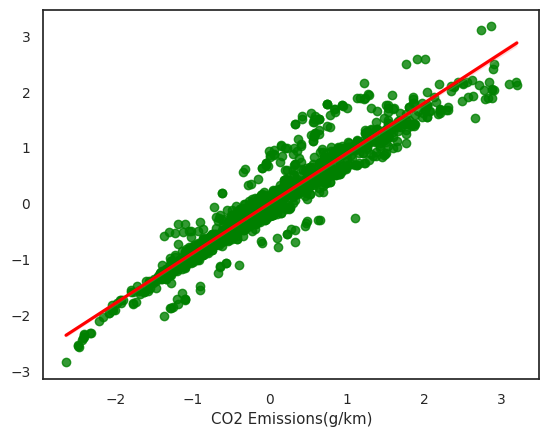

In [ ]:
sns.regplot(x=y_test, y=elastic_net_predict, scatter_kws={'color':'green',},line_kws={'color':'red'})